Error processing file 004027.wav: plot_signal() takes 2 positional arguments but 3 were given


KeyboardInterrupt: 

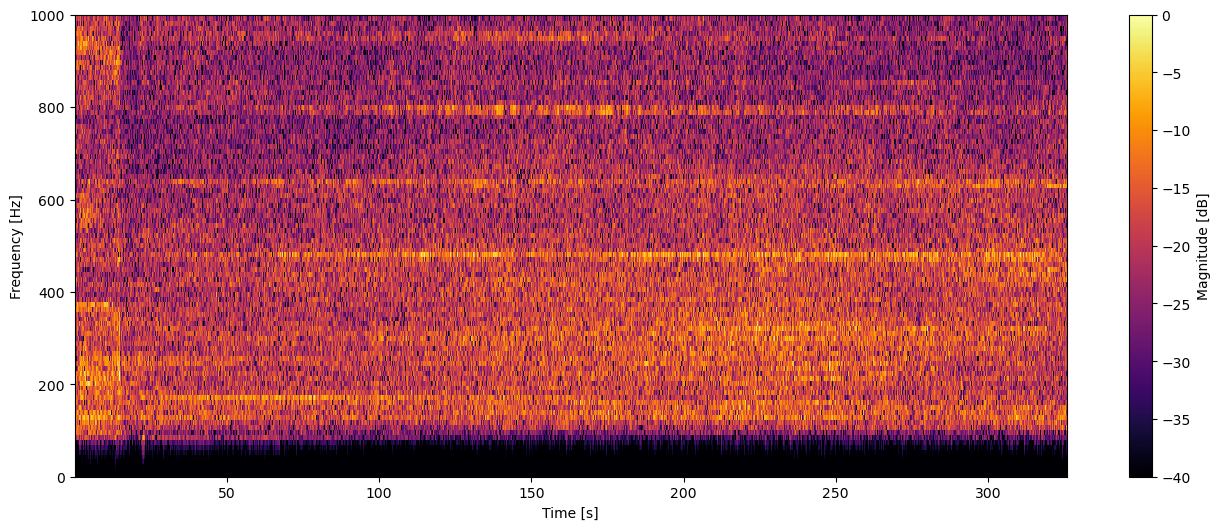

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq	# FFT and helper functions
import numpy as np

from functions import plot_spectrogram, plot_spectrum, butter_highpass_filter, plot_signal

import os

fmax = 1e3
n_samples = 3000


def process_wav_files_in_directory(target_directory):
    # Iterate through all items in the specified directory
    for item in os.listdir(target_directory):
        # Check if the item is a `.wav` file
        if item.endswith('.wav'):
            file_path = os.path.join(target_directory, item)
            try:
                # Read the .wav file
                sample_rate, samples = wavfile.read(file_path)

                # Calculate the spectrogram
                frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

                x1 = butter_highpass_filter(samples, 100, sample_rate)
                
                jpeg_item = item.replace(".wav", ".jpeg")
                ok = plot_spectrogram(x1, times, sample_rate, n_samples, fmax, (spectrogram_output +"/"+jpeg_item))
                pk = plot_spectrum(x1, sample_rate, fmax, (spectrum_output+"/"+jpeg_item))

                t1 = np.linspace(0,(len(samples)/sample_rate),len(samples))
                sig = plot_signal(samples,t1, (signal_output+"/"+jpeg_item))

                # Output some details
                print(f"Processed file: {item}")
                print(f"Sample rate: {sample_rate}")
                print(f"Spectrogram shape: {spectrogram.shape}\n")
            except Exception as e:
                print(f"Error processing file {item}: {e}")

if __name__ == "__main__":
    # Specify the directory containing the .wav files
    target_directory = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Wav_files"

    spectrogram_output = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Processing_scripts/Plots/Spectrograms"
    spectrum_output = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Processing_scripts/Plots/Spectrum_plots"
    signal_output = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Processing_scripts/Plots/Signal_plots"

    if os.path.isdir(target_directory):
        process_wav_files_in_directory(target_directory)
    else:
        print(f"The specified directory does not exist: {target_directory}")


"""
sample_rate, samples = wavfile.read('/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Wav_files/41.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

fmax = 1e3
n_samples = 3000

x1 = butter_highpass_filter(samples, 100, sample_rate)

ok = plot_spectrogram(x1, times, sample_rate, n_samples, fmax)
pk = plot_spectrum(x1, sample_rate, fmax)
t1 = np.linspace(0,(len(samples)/sample_rate),len(samples))
sig = plot_signal(samples,t1)
"""